In [1]:
# coding:utf-8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from mydatools.plot import plot_classifier_paras

%matplotlib inline
sns.set_style({'font.sans-serif':['simhei','Arial']})
sns.set_style('white')

## 感知机实现

In [2]:
class Perceptron(object):
    def __init__(self, epoch=100, lr=0.1):
        self.epoch = epoch
        self.lr = lr
        
    def _sgd(self):
        # init w/b
        self.w = np.zeros((self.X.shape[1], 1))
        self.b = 0
        
        for i in range(self.epoch):
            # 判断是否还有误分类点
            is_error = self.y * ((self.X.dot(self.w) + self.b).reshape(-1)) <= 0
            if is_error.sum() == 0:
                break
            
            # 随机一个点（仅在误分类点中随机）
            random_proba = is_error/is_error.sum()
            random_index = np.random.choice(self.X.shape[0], p=random_proba)
            xi = self.X[random_index]
            yi = self.y[random_index]
            
            # 梯度下降
            self.w += self.lr * yi * xi.reshape(self.w.shape)
            self.b += self.lr * yi
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self._sgd()
        
    def predict(self, X_pred):
        X_pred = np.array(X_pred)
        y_pred = (X_pred.dot(self.w) + self.b).reshape(-1)
        y_pred = np.where(y_pred > 0, 1, -1)
        return y_pred


## 效果展示

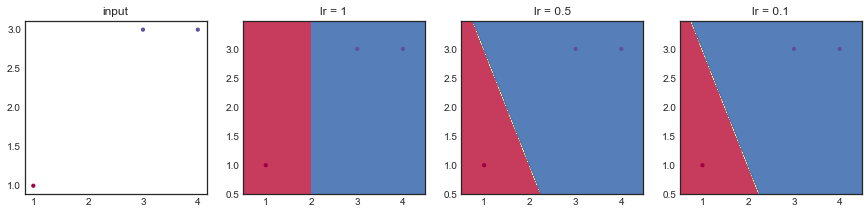

In [3]:
dataset = np.array([
    [3,3,1],
    [4,3,1],
    [1,1,-1],
])
X_train = dataset[:, :-1]
y_train = dataset[:, -1]

plot_classifier_paras(Perceptron, X_train, y_train, {'lr':[1, 0.5, 0.1]})